# Objective

* Build a Model which identify the bad customer for loan disburement
* Yes = loan Reject ( Bad Customers ) , No =loan approved ( Good  Customers )

In [1]:
################# Data Analysis & Calculation #################
import numpy as np
import pandas as pd

import os

################# ignore Warning #################
import warnings
warnings.filterwarnings("ignore")

################# visualization #################
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Importing

In [2]:
heart = pd.read_csv (r"C:\Users\sansk\Downloads\Machine Learning projects\Heart Diabeties\heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.set_index('age', inplace=True)

# Check the DataFrame to ensure the index is set
print(heart.head())


     sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  \
age                                                                           
63     1   3     145   233    1        0       150     0      2.3    0    0   
37     1   2     130   250    0        1       187     0      3.5    0    0   
41     0   1     130   204    0        0       172     0      1.4    2    0   
56     1   1     120   236    0        1       178     0      0.8    2    0   
57     0   0     120   354    0        1       163     1      0.6    2    0   

     thall  output  
age                 
63       1       1  
37       2       1  
41       2       1  
56       2       1  
57       2       1  


# 2. Data Pre-Processing

1. Data Type and conversion
2. Identifying & Treatment Missing Value

#### 2.1. Data Type and conversion

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 63 to 57
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trtbps    303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalachh  303 non-null    int64  
 7   exng      303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slp       303 non-null    int64  
 10  caa       303 non-null    int64  
 11  thall     303 non-null    int64  
 12  output    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.1 KB


#### 2.2. Identifying & Treatment Missing Value

In [5]:
heart.isnull().sum()

sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
heart.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

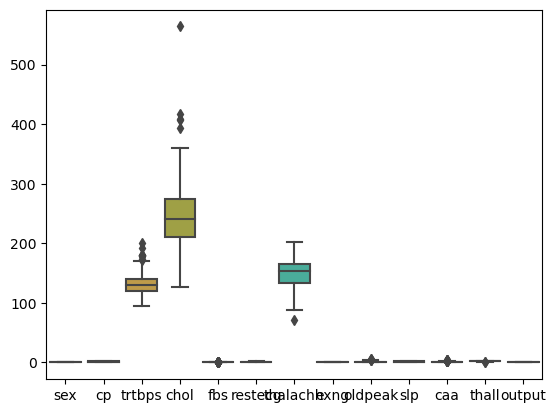

In [7]:
sns.boxplot(data=heart)

In [8]:
for i in heart:                  # i = column name 
    if heart[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = heart[i].quantile(0.25)  # for 1 column compute q1
        q3 = heart[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        heart[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

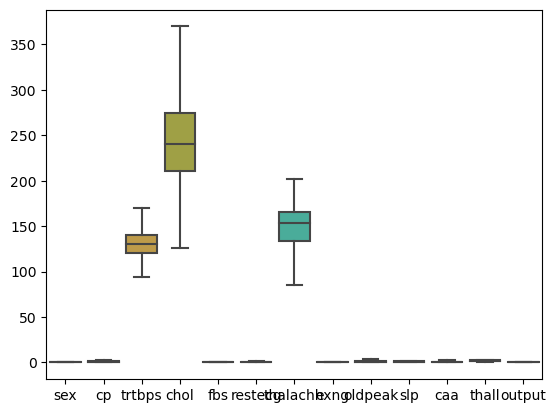

In [9]:
sns.boxplot(data=heart)

# 5. Data Partition

In [10]:
from sklearn.model_selection import train_test_split

# Assuming 'heart' is your DataFrame and 'output' is the target variable
X = heart.drop('output', axis=1)  # Features
Y = heart[['output']]               # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

# Check the shapes of the resulting sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(242, 12) (61, 12) (242, 1) (61, 1)


In [26]:
X_train

,cp,fbs,thalachh,oldpeak,thall
age,,,,,
52,1,0,184.0,0.0,2.0
56,0,0,150.0,1.9,3.0
57,0,0,123.0,0.2,3.0
35,0,0,156.0,0.0,3.0
67,0,0,163.0,0.2,3.0
...,...,...,...,...,...
64,0,0,96.0,2.2,2.0
42,2,0,173.0,0.0,2.0
41,2,0,172.0,0.0,2.0


In [27]:
X_test

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,,,,,,,,,,,,
45,1,1,128,308.0,0,0,170.0,0,0.0,2,0.0,2.0
63,1,0,130,254.0,0,0,147.0,0,1.4,1,1.0,3.0
62,1,1,128,208.0,0,0,140.0,0,0.0,2,0.0,2.0
64,1,0,145,212.0,0,0,132.0,0,2.0,1,2.0,1.0
41,0,1,130,204.0,0,0,172.0,0,1.4,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
58,1,0,150,270.0,0,0,111.0,1,0.8,2,0.0,3.0
59,1,2,150,212.0,0,1,157.0,0,1.6,2,0.0,2.0
48,1,0,130,256.0,0,0,150.0,1,0.0,2,2.0,3.0


In [11]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,,,,
52,1,1,128,205.00,0,1,184.0,0,0.0,2,0.0,2.0,1
56,0,0,134,369.75,0,0,150.0,1,1.9,1,2.0,3.0,0
57,0,0,140,241.00,0,1,123.0,1,0.2,1,0.0,3.0,0
35,1,0,126,282.00,0,0,156.0,1,0.0,2,0.0,3.0,0
67,1,0,125,254.00,0,1,163.0,0,0.2,1,2.0,3.0,0


In [25]:
X_train

,cp,fbs,thalachh,oldpeak,thall
age,,,,,
52,1,0,184.0,0.0,2.0
56,0,0,150.0,1.9,3.0
57,0,0,123.0,0.2,3.0
35,0,0,156.0,0.0,3.0
67,0,0,163.0,0.2,3.0
...,...,...,...,...,...
64,0,0,96.0,2.2,2.0
42,2,0,173.0,0.0,2.0
41,2,0,172.0,0.0,2.0


# Model building

# Logistics Regression

In [12]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
Model3 = sfs(logreg, n_features_to_select=5, direction='forward', scoring='accuracy')
Model3.fit(X_train,y_train)  # fit = apply

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=5, scoring='accuracy')

In [13]:
Model3.feature_names_in_

array(['sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'], dtype=object)

In [14]:
Model3.get_feature_names_out()

array(['cp', 'fbs', 'thalachh', 'oldpeak', 'thall'], dtype=object)

In [15]:
X_train = X_train.loc[:,['cp', 'fbs', 'thalachh', 'oldpeak', 'thall']]
X_train.head()

,cp,fbs,thalachh,oldpeak,thall
age,,,,,
52,1,0,184.0,0.0,2.0
56,0,0,150.0,1.9,3.0
57,0,0,123.0,0.2,3.0
35,0,0,156.0,0.0,3.0
67,0,0,163.0,0.2,3.0


In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train) # model = output

In [17]:
output.intercept_  # beto

array([-2.01888096])

In [18]:
output.coef_  # Beta 1 --

array([[ 0.73570475,  0.        ,  0.02843534, -0.80586353, -0.88172809]])

In [19]:
output.feature_names_in_

array(['cp', 'fbs', 'thalachh', 'oldpeak', 'thall'], dtype=object)

# Step 6 : Predictions on Train Dataset

In [20]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,cp,fbs,thalachh,oldpeak,thall,output
age,,,,,,
52,1,0,184.0,0.0,2.0,1
56,0,0,150.0,1.9,3.0,0
57,0,0,123.0,0.2,3.0,0
35,0,0,156.0,0.0,3.0,0
67,0,0,163.0,0.2,3.0,0


train['Predicted']=output.predict(X_train)
train.head()

In [21]:
train['Probability_Bad']= output.predict_proba(X_train)[:,1]  # [Row , column]
train.head()

,cp,fbs,thalachh,oldpeak,thall,output,Probability_Bad
age,,,,,,,
52,1,0,184.0,0.0,2.0,1,0.898937
56,0,0,150.0,1.9,3.0,0,0.126761
57,0,0,123.0,0.2,3.0,0,0.209542
35,0,0,156.0,0.0,3.0,0,0.443208
67,0,0,163.0,0.2,3.0,0,0.452574


In [22]:
train['Predicted'] = np.where(train['Probability_Bad'] >= 0.7,1,0)
train.head()

,cp,fbs,thalachh,oldpeak,thall,output,Probability_Bad,Predicted
age,,,,,,,,
52,1,0,184.0,0.0,2.0,1,0.898937,1
56,0,0,150.0,1.9,3.0,0,0.126761,0
57,0,0,123.0,0.2,3.0,0,0.209542,0
35,0,0,156.0,0.0,3.0,0,0.443208,0
67,0,0,163.0,0.2,3.0,0,0.452574,0


# Step 7 : Model Performance Metrics

In [23]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['output'])
matrix

array([[95, 46],
       [15, 86]], dtype=int64)

In [24]:

Accuracy_Train=((95+86)/(242)*100)
print(Accuracy_Train)

74.79338842975206


* Accuracy of Model is 74.79% , So we say Model good fit data  

In [66]:
from sklearn.metrics import classification_report

print(classification_report(train['output'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.67      0.86      0.76       110
           1       0.85      0.65      0.74       132

    accuracy                           0.75       242
   macro avg       0.76      0.76      0.75       242
weighted avg       0.77      0.75      0.75       242



* Accuracy of  Model is 75%,Hence Model is good Fit
* Accuracy of Bad Customer Capture by Model is 65% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 85% (Specificity)

# Step 8 : Predictions on Test Dataset

In [67]:
X_test = X_test.loc[:,['cp', 'fbs', 'thalachh', 'oldpeak', 'thall']]
X_test.head()

,cp,fbs,thalachh,oldpeak,thall
age,,,,,
45,1,0,170.0,0.0,2.0
63,0,0,147.0,1.4,3.0
62,1,0,140.0,0.0,2.0
64,0,0,132.0,2.0,1.0
41,1,0,172.0,1.4,2.0


In [68]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,cp,fbs,thalachh,oldpeak,thall,output
age,,,,,,
45,1,0,170.0,0.0,2.0,1
63,0,0,147.0,1.4,3.0,0
62,1,0,140.0,0.0,2.0,1
64,0,0,132.0,2.0,1.0,0
41,1,0,172.0,1.4,2.0,1


In [69]:
test['Probability_Bad'] = output.predict_proba(X_test)[:,1]
test.head()

,cp,fbs,thalachh,oldpeak,thall,output,Probability_Bad
age,,,,,,,
45,1,0,170.0,0.0,2.0,1,0.856605
63,0,0,147.0,1.4,3.0,0,0.166272
62,1,0,140.0,0.0,2.0,1,0.717950
64,0,0,132.0,2.0,1.0,0,0.318891
41,1,0,172.0,1.4,2.0,1,0.671734


In [70]:
test['Predicted'] = np.where(test['Probability_Bad'] >= 0.7,1,0)
test.head()

,cp,fbs,thalachh,oldpeak,thall,output,Probability_Bad,Predicted
age,,,,,,,,
45,1,0,170.0,0.0,2.0,1,0.856605,1
63,0,0,147.0,1.4,3.0,0,0.166272,0
62,1,0,140.0,0.0,2.0,1,0.717950,1
64,0,0,132.0,2.0,1.0,0,0.318891,0
41,1,0,172.0,1.4,2.0,1,0.671734,0


# Step 9 : Model Performance Metrics on Test data

In [71]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['output'])
print(matrix)

[[26 16]
 [ 2 17]]


In [72]:
Accuracy_test=((26+17)/(61)*100)
Accuracy_test

70.49180327868852

In [74]:
from sklearn.metrics import classification_report
print(classification_report(test['output'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.62      0.93      0.74        28
           1       0.89      0.52      0.65        33

    accuracy                           0.70        61
   macro avg       0.76      0.72      0.70        61
weighted avg       0.77      0.70      0.69        61



# Decision Tree

In [75]:
from sklearn.model_selection import train_test_split

# Assuming 'heart' is your DataFrame and 'output' is the target variable
X = heart.drop('output', axis=1)  # Features
Y = heart[['output']]               # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

# Check the shapes of the resulting sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(242, 12) (61, 12) (242, 1) (61, 1)


## Model Building

In [76]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

dt = DecisionTreeClassifier()  # by default it use Gini index for split
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

In [77]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,output,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,,,,,,,,,,,,,
52,1,1,1,128,205.00,0,1,184.0,0,0.0,2,0.0,2.0
56,0,0,0,134,369.75,0,0,150.0,1,1.9,1,2.0,3.0
57,0,0,0,140,241.00,0,1,123.0,1,0.2,1,0.0,3.0
35,0,1,0,126,282.00,0,0,156.0,1,0.0,2,0.0,3.0
67,0,1,0,125,254.00,0,1,163.0,0,0.2,1,2.0,3.0


In [79]:
independent_variable = list(train.columns[1:])
independent_variable

['sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

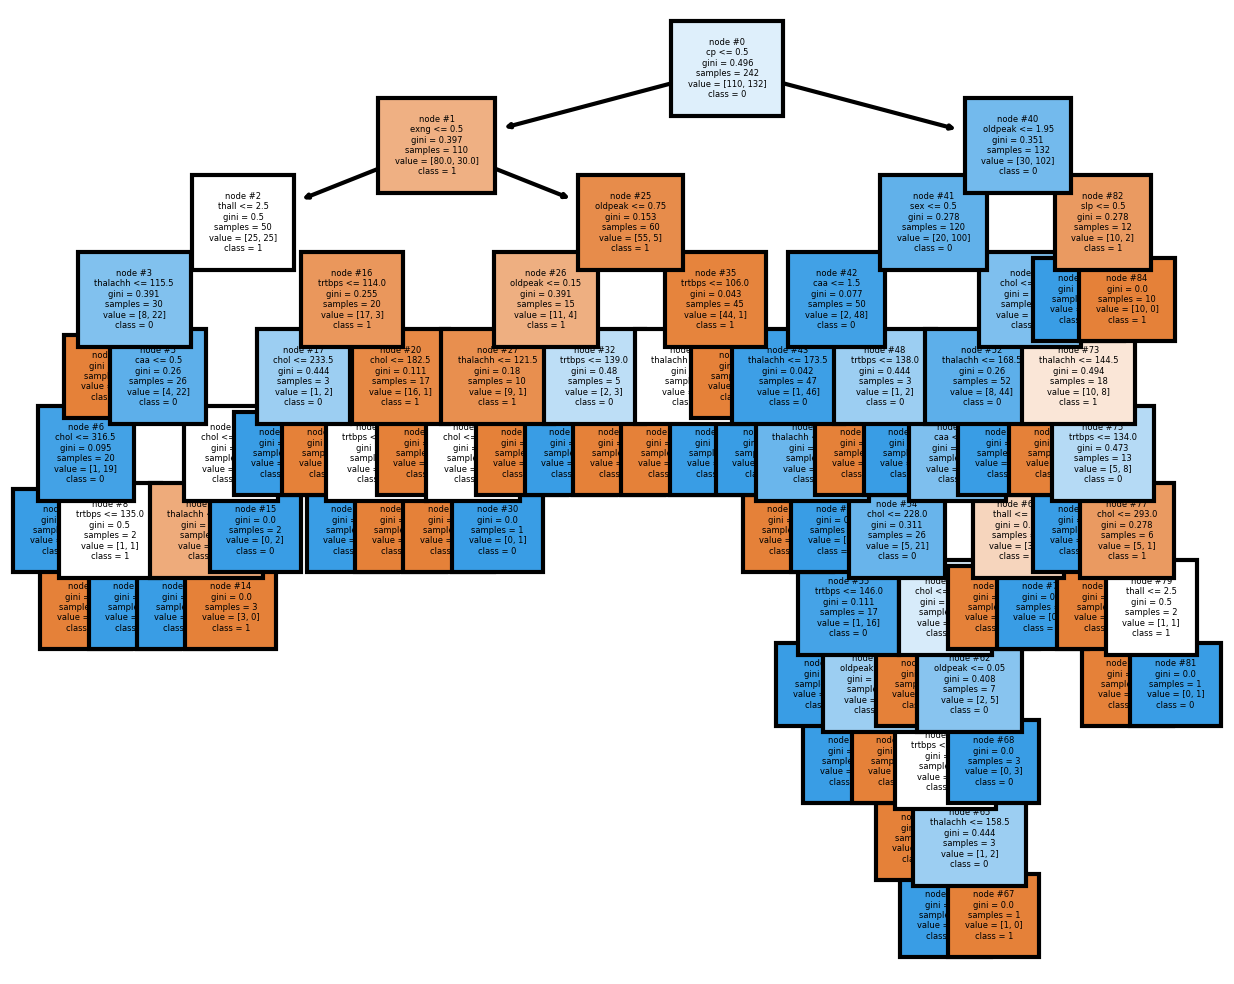

In [80]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Chance_of_Admit = ['1', '0']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4),dpi=300)
plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = Chance_of_Admit, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2);

## Prediction On Train Data


In [81]:
train.head()

,output,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,,,,,,,,,,,,,
52,1,1,1,128,205.00,0,1,184.0,0,0.0,2,0.0,2.0
56,0,0,0,134,369.75,0,0,150.0,1,1.9,1,2.0,3.0
57,0,0,0,140,241.00,0,1,123.0,1,0.2,1,0.0,3.0
35,0,1,0,126,282.00,0,0,156.0,1,0.0,2,0.0,3.0
67,0,1,0,125,254.00,0,1,163.0,0,0.2,1,2.0,3.0


In [82]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,output,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,Predicted
age,,,,,,,,,,,,,,
52,1,1,1,128,205.00,0,1,184.0,0,0.0,2,0.0,2.0,1
56,0,0,0,134,369.75,0,0,150.0,1,1.9,1,2.0,3.0,0
57,0,0,0,140,241.00,0,1,123.0,1,0.2,1,0.0,3.0,0
35,0,1,0,126,282.00,0,0,156.0,1,0.0,2,0.0,3.0,0
67,0,1,0,125,254.00,0,1,163.0,0,0.2,1,2.0,3.0,0


In [83]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['output'])
print(matrix)

[[110   0]
 [  0 132]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(train['output'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



### Model is Overfitting we need to control Over fitting

In [92]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=10, ## child
                                 min_samples_split=50, #parent 
                                 max_depth=4)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=50)

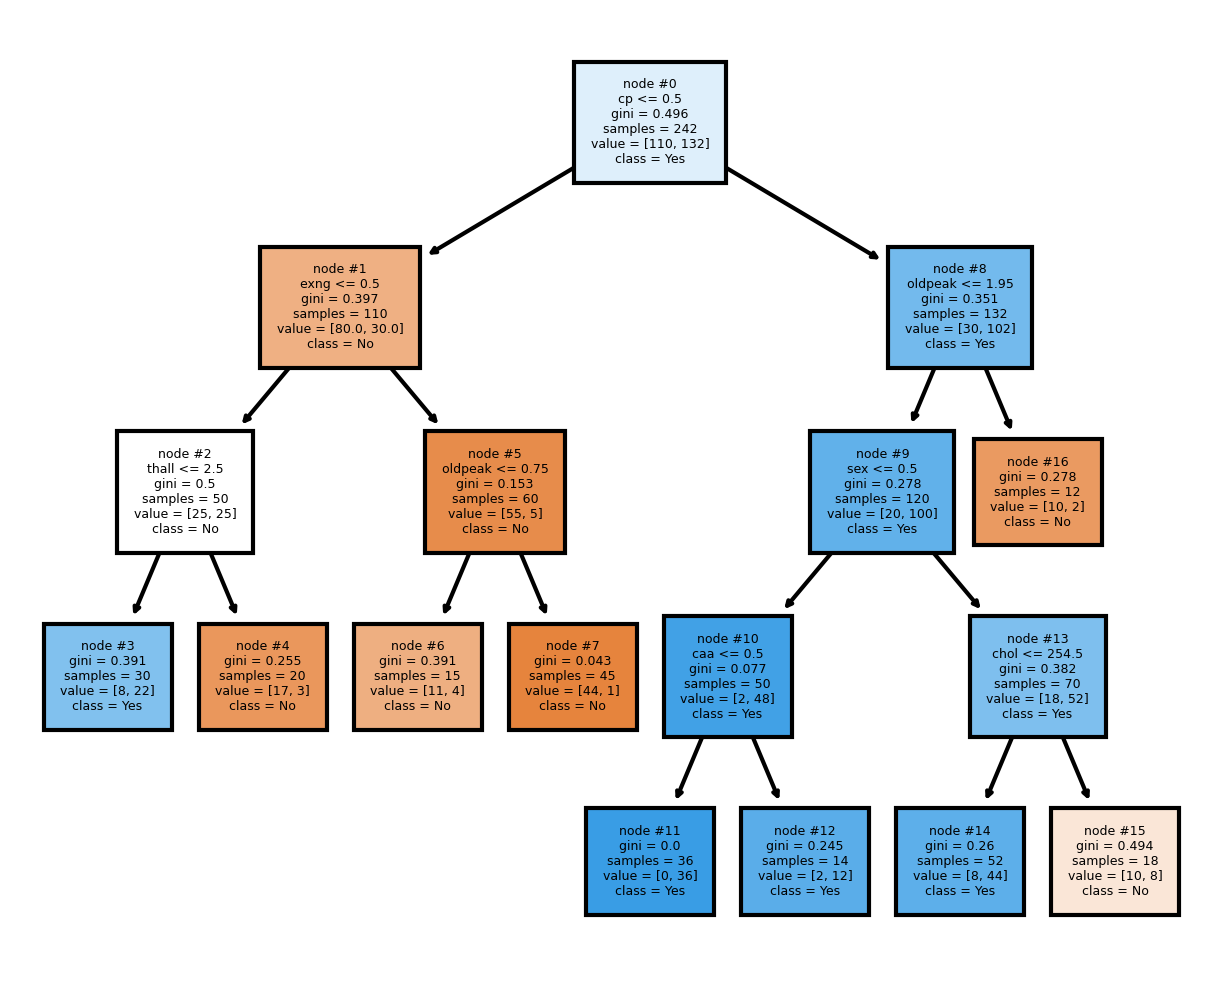

In [93]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
               node_ids = True, # node number
               fontsize=3); # 

In [94]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,output,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,Predicted
age,,,,,,,,,,,,,,
52,1,1,1,128,205.00,0,1,184.0,0,0.0,2,0.0,2.0,1
56,0,0,0,134,369.75,0,0,150.0,1,1.9,1,2.0,3.0,0
57,0,0,0,140,241.00,0,1,123.0,1,0.2,1,0.0,3.0,0
35,0,1,0,126,282.00,0,0,156.0,1,0.0,2,0.0,3.0,0
67,0,1,0,125,254.00,0,1,163.0,0,0.2,1,2.0,3.0,0


In [95]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['output'])
print(matrix)

[[ 92  18]
 [ 18 114]]


In [96]:
from sklearn.metrics import classification_report
print(classification_report(train['output'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.86      0.86      0.86       132

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



* Accuracy of  Model is 85%,Hence Model is good Fit
* Accuracy of Bad Customer Capture by Model is 86% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 84% (Specificity)

# Random Forest

In [97]:
from sklearn.model_selection import train_test_split

# Assuming 'heart' is your DataFrame and 'output' is the target variable
X = heart.drop('output', axis=1)  # Features
Y = heart[['output']]               # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

# Check the shapes of the resulting sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(242, 12) (61, 12) (242, 1) (61, 1)


## Model Building

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(random_state=20,
                               n_estimators=25, # make 25 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=25, random_state=20)

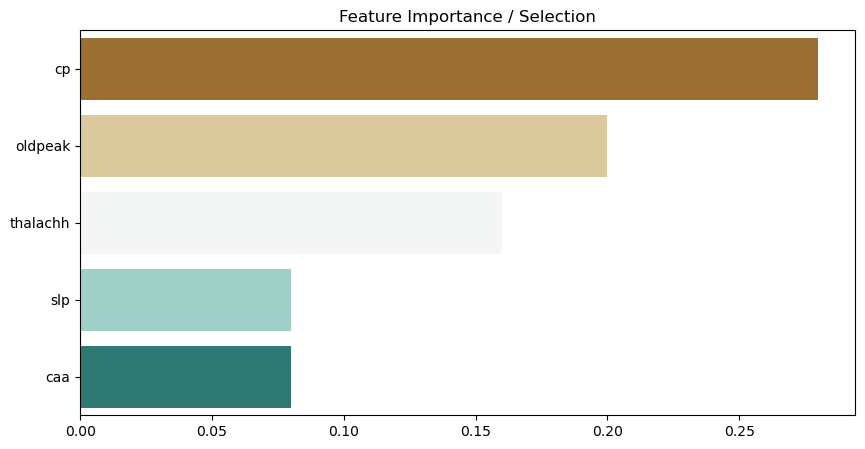

In [99]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG", orient='h')


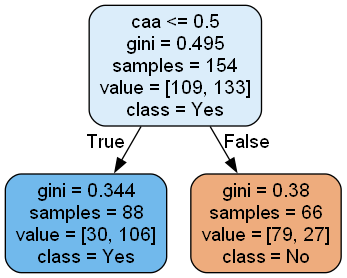

In [100]:
from sklearn.tree import export_graphviz

import pydot

feature_list = list(X.columns)  # all independent variable name
Churn = ['No','Yes'] 

tree = Model.estimators_[2]  # 0-24 specify the tree number   

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                class_names = Churn,
                rounded = True, 
                filled=True)
(graph, ) = pydot.graph_from_dot_file('abc.dot')
graph.write_png('tree.png')


from IPython.display import Image
Image(filename = 'tree.png')

In [101]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,,,,
52,1,1,128,205.00,0,1,184.0,0,0.0,2,0.0,2.0,1
56,0,0,134,369.75,0,0,150.0,1,1.9,1,2.0,3.0,0
57,0,0,140,241.00,0,1,123.0,1,0.2,1,0.0,3.0,0
35,1,0,126,282.00,0,0,156.0,1,0.0,2,0.0,3.0,0
67,1,0,125,254.00,0,1,163.0,0,0.2,1,2.0,3.0,0


In [102]:
train['Predicted'] = Model.predict(X_train)
train.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Predicted
age,,,,,,,,,,,,,,
52,1,1,128,205.00,0,1,184.0,0,0.0,2,0.0,2.0,1,1
56,0,0,134,369.75,0,0,150.0,1,1.9,1,2.0,3.0,0,0
57,0,0,140,241.00,0,1,123.0,1,0.2,1,0.0,3.0,0,0
35,1,0,126,282.00,0,0,156.0,1,0.0,2,0.0,3.0,0,0
67,1,0,125,254.00,0,1,163.0,0,0.2,1,2.0,3.0,0,0


In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Predicted'],train['output'])
print(confusion_matrix)

[[ 82  19]
 [ 28 113]]


In [104]:
from sklearn.metrics import classification_report
print(classification_report(train['output'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       110
           1       0.80      0.86      0.83       132

    accuracy                           0.81       242
   macro avg       0.81      0.80      0.80       242
weighted avg       0.81      0.81      0.80       242



* Accuracy of  Model is 81%,Hence Model is good Fit
* Accuracy of Bad Customer Capture by Model is 86% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 75% (Specificity)

# From the final result, We got 
* Logistic Regression:75%
* Decision Tree: 85%
* Random forest: 81%

# Decision Tree is the best Algorithm for aur model, It get highest Accuracy with 85%.

In [105]:
import pickle


In [106]:

pickle.dump(dt, open(r'C:\Users\sansk\Downloads\Machine Learning projects\Heart Diabeties\Model.pkl','wb'))